<a href="https://colab.research.google.com/github/gnidetsanna/python_for_ML_tasks/blob/main/HW_2_5_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85_hnidets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Знайомство з даними

###Завдання 1###
 Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
df_cars = pd.read_csv('/content/drive/MyDrive/Homeworks/cars.csv')

df_cars.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


###Завдання 2###
Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:

def get_actual_dtypes(series):
    return series.apply(type).value_counts()


column_dtypes = df_cars.dtypes.reset_index()
column_dtypes.columns = ['Column', 'DataType']


actual_dtypes = pd.DataFrame(columns=['Column', 'ActualDataType', 'Count'])
for col in df_cars.select_dtypes(include=['object']).columns:
    dtype_counts = get_actual_dtypes(df_cars[col])
    dtype_df = pd.DataFrame({
        'Column': col,
        'ActualDataType': dtype_counts.index.astype(str),
        'Count': dtype_counts.values
    })
    actual_dtypes = pd.concat([actual_dtypes, dtype_df], ignore_index=True)


categorical_counts = pd.DataFrame(columns=['Column', 'UniqueCount'])
for col in df_cars.select_dtypes(include=['object', 'category']).columns:
    unique_count = df_cars[col].nunique()
    categorical_counts = pd.concat([categorical_counts, pd.DataFrame({'Column': [col], 'UniqueCount': [unique_count]})], ignore_index=True)


result = column_dtypes.merge(actual_dtypes, on='Column', how='left')
result = result.merge(categorical_counts, on='Column', how='left')
print(result)

               Column DataType ActualDataType Count UniqueCount
0              Car_ID    int64            NaN   NaN         NaN
1               Brand   object  <class 'str'>   100          11
2               Model   object  <class 'str'>   100          58
3                Year    int64            NaN   NaN         NaN
4   Kilometers_Driven    int64            NaN   NaN         NaN
5           Fuel_Type   object  <class 'str'>   100           2
6        Transmission   object  <class 'str'>   100           2
7          Owner_Type   object  <class 'str'>   100           3
8             Mileage    int64            NaN   NaN         NaN
9              Engine    int64            NaN   NaN         NaN
10              Power    int64            NaN   NaN         NaN
11              Seats    int64            NaN   NaN         NaN
12              Price    int64            NaN   NaN         NaN


###Висновок 2###
В наборі даних 13 колонок - 8 числових і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 1 колонки, в яких можна встановити відношення порядку (Owner_Type)

###Завдання 3###
Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [4]:
from sklearn.model_selection import train_test_split

inputs = df_cars.drop(columns=['Price'])
targets = df_cars['Price']
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)
len(X_train),len(y_train)

(80, 80)

In [5]:
print("Індекси X_train:", X_train.index[:10])
print("Індекси y_train:", y_train.index[:10])

Індекси X_train: Index([83, 55, 26, 54, 19, 57, 46, 23, 36, 91], dtype='int64')
Індекси y_train: Index([83, 55, 26, 54, 19, 57, 46, 23, 36, 91], dtype='int64')


###Завдання 4###
Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [6]:
fuel_type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['fuel_type_codes'] = X_train.Fuel_Type.map(fuel_type_codes)
X_test['fuel_type_codes'] = X_test.Fuel_Type.map(fuel_type_codes)

In [7]:
transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['transmission_codes'] = X_train.Transmission.map(transmission_codes)
X_test['transmission_codes'] = X_test.Transmission.map(transmission_codes)

In [8]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(X_train[['Brand']])
one_hot_train = enc.transform(X_train[['Brand']]).toarray()



X_train[enc.categories_[0]] = one_hot_train


one_hot_test = enc.transform(X_test[['Brand']]).toarray()


X_test[enc.categories_[0]] = one_hot_test

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [10]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

Очікуваний результат після трансформацій:

In [11]:
#pd.set_option('display.max_columns', 100)
#display(X_train.head()), display(X_test.head())

###Завдання 5###
Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [12]:
train_data = pd.concat([X_train, y_train], axis=1).select_dtypes(include=['float64','int64'])
train_data

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,2020,30000,23,1248,74,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,600000
2,3,2017,20000,10,4951,395,4,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500000
6,7,2018,45000,15,2179,140,7,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,900000
27,28,2019,22000,18,1995,187,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2800000


In [13]:
corr_matrix = train_data.corr()

def highlight_correlation(val):
    color = 'yellow' if (val >= 0.50 and val < 1) or (val <= -0.50 and val > -1) else 'white'
    return f'background-color: {color}'

# Застосувати стилізацію до матриці кореляцій
styled_correlation_matrix = corr_matrix.style.applymap(highlight_correlation)

# Вивести стилізовану матрицю кореляцій
styled_correlation_matrix

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.090537,-0.084381,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.000979
fuel_type_codes,0.090537,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.110782
transmission_codes,-0.084381,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.680731
Audi,0.089473,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.328858


###Висновок 5###

Кореляція більше 0,5 за модулем для цільової змінної Price спостерігається в таких парах:
1. Price - Engine = 0,710561
2. Price - Power = 0.849137
3. Price - transmission_codes = 0.680731
Більша ціна у випадку зростання об'єму двигуна, потужності двигуна і типу трансмісії автомат)

І негативна
1. Price - Mileage = -0.638404 ( із зростанням пробігу менша ціна)

###Завдання 6###
Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [14]:
list_to_drop = X_train.select_dtypes(include='object')

X_train = X_train.drop(columns=list_to_drop)

In [15]:
X_test = X_test.drop(columns=list_to_drop)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
model_train = LinearRegression().fit(X_train, y_train)
predictions_train = model_train.predict(X_train)
loss = mean_squared_error(y_train, predictions_train, squared=False)
print('Loss:', loss)

Loss: 210293.57828151877


In [18]:
predictions_test = model_train.predict(X_test)
loss = mean_squared_error(y_test, predictions_test, squared=False)
print('Loss:', loss)

Loss: 258181.56112032934


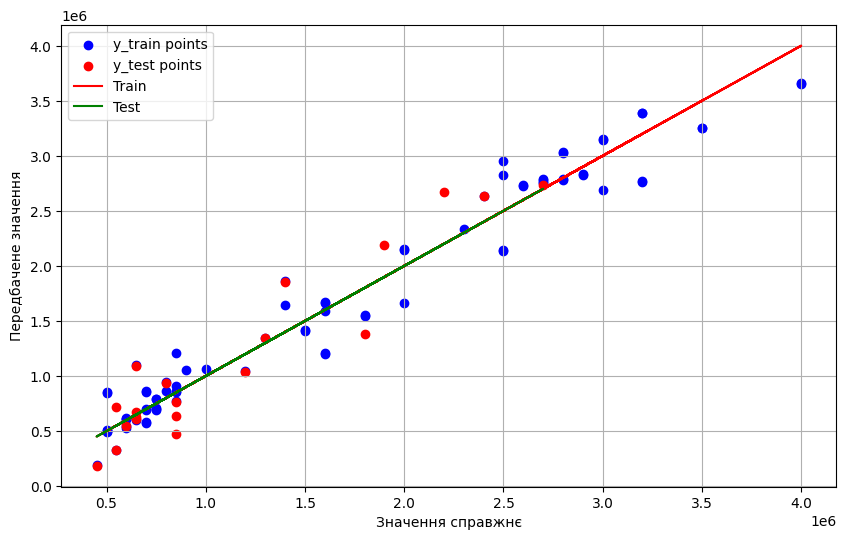

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predictions_train,  color='blue', label='y_train points')
plt.scatter(y_test, predictions_test,  color='red', label='y_test points')

plt.plot(y_train, y_train, color='red', label='Train')
plt.plot(y_test, y_test, color='green', label='Test')
plt.xlabel('Значення справжнє')
plt.ylabel('Передбачене значення')
plt.legend()
plt.grid(True)
plt.show()

###Висновок 6###

Бачимо що помилка у передбаченнях обох моделей ідентична, дані розташовані близько до ліній, але розподіл значень цільової змінної в тестовому діапазоні вужчий ніж в тренувальній, що свідчить про те що можливо в тестовий діапазон не потрапили данні більші ща 2,7. Проте обчислення rmse показує що поки все добре.


###Завдання 7###
 Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [20]:
from sklearn.preprocessing import StandardScaler


In [21]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

normalized_x_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

X_test_scaled = scaler.transform(X_test)

normalized_x_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [22]:
model_train_scaled = LinearRegression().fit(normalized_x_train, y_train)
predictions_train = model_train_scaled.predict(normalized_x_train)
loss = mean_squared_error(y_train, predictions_train, squared=False)
print('Loss:', loss)

Loss: 210293.57828151854


In [23]:
predictions_test = model_train_scaled.predict(normalized_x_test)
loss = mean_squared_error(y_test, predictions_test, squared=False)
print('Loss:', loss)

Loss: 258181.56112032832


In [24]:
model_train_scaled.coef_, model_train_scaled.intercept_, model_train_scaled.feature_names_in_

(array([   5608.68542149,   -8765.64571392,  -94398.72148597,
        -131715.51202972,  -21377.45333789,  496769.21489874,
          -2148.92454899, -183848.01890892,  116693.76820576,
         205600.14776875,  208407.31378257, -118209.45031066,
         -62753.005386  , -152304.86391146, -140945.16290405,
        -112259.96701985,  210048.78114763,  -65996.24697212,
          15805.70151142,  -92968.2600652 ,   42344.95281544]),
 1680000.0000000002,
 array(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine',
        'Power', 'Seats', 'fuel_type_codes', 'transmission_codes', 'Audi',
        'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'Owner_Type_Codes'],
       dtype=object))

In [25]:
normalized_x_train.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,1.090928,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
55,0.100381,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,-1.025320,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
26,-0.925542,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,0.975305,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
54,0.065005,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
19,-1.173178,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,2.808717,-0.377964,-0.333333,-0.309662,0.535303


In [26]:
a = model_train_scaled.coef_
index_1 = np.argmax(a)
index_2 = np.argmin(a)
index_1, index_2

(5, 7)

In [27]:
 normalized_x_train.columns[index_1],  normalized_x_train.columns[index_2]

('Power', 'fuel_type_codes')

In [28]:
normalized_x_train.shape, y_train.shape

((80, 21), (80,))

###Висновок 7###

Порахувавши по індексу, бачимо що максимальне значення в колонки Power,
мінімальне у колонки fuel_type_codes

###Завдання 8###
 На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [62]:
import statsmodels.api as sm

Y = y_train
X = normalized_x_train
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params


const                 1.680000e+06
Car_ID                5.608685e+03
Year                 -8.765646e+03
Kilometers_Driven    -9.439872e+04
Mileage              -1.317155e+05
Engine               -2.137745e+04
Power                 4.967692e+05
Seats                -2.148925e+03
fuel_type_codes      -1.838480e+05
transmission_codes    1.166938e+05
Audi                  2.056001e+05
BMW                   2.084073e+05
Ford                 -1.182095e+05
Honda                -6.275301e+04
Hyundai              -1.523049e+05
Mahindra             -1.409452e+05
Maruti               -1.122600e+05
Mercedes              2.100488e+05
Tata                 -6.599625e+04
Toyota                1.580570e+04
Volkswagen           -9.296826e+04
Owner_Type_Codes      4.234495e+04
dtype: float64

In [63]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Wed, 29 May 2024   Prob (F-statistic):           2.01e-33
Time:                        13:51:13   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.74

In [64]:
summary = results.summary()

table = summary.tables[1]

df = pd.DataFrame(table.data[1:], columns=table.data[0])

df['P>|t|'] = pd.to_numeric(df['P>|t|'])

df[df['P>|t|'] <= 0.05]


,,coef,std err,t,P>|t|,[0.025,0.975]
0,const,1.68e+06,2.74e+04,61.363,0.000,1.63e+06,1.73e+06
4,Mileage,-1.317e+05,5.83e+04,-2.259,0.028,-2.48e+05,-1.5e+04
6,Power,4.968e+05,7.54e+04,6.588,0.000,3.46e+05,6.48e+05
8,fuel_type_codes,-1.838e+05,4.57e+04,-4.026,0.000,-2.75e+05,-9.25e+04
9,transmission_codes,1.167e+05,4.4e+04,2.653,0.010,2.87e+04,2.05e+05
10,Audi,2.056e+05,3.05e+04,6.738,0.000,1.45e+05,2.67e+05
11,BMW,2.084e+05,3.19e+04,6.532,0.000,1.45e+05,2.72e+05
12,Ford,-1.182e+05,3.37e+04,-3.507,0.001,-1.86e+05,-5.08e+04
14,Hyundai,-1.523e+05,2.9e+04,-5.247,0.000,-2.1e+05,-9.42e+04
15,Mahindra,-1.409e+05,2.97e+04,-4.747,0.000,-2e+05,-8.15e+04


###Завдання 9###
 Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [65]:
var_columns = ['Mileage', 'Power', 'fuel_type_codes', 'transmission_codes', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Volkswagen']
Y = y_train
X = normalized_x_train[var_columns]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results_2 = model.fit()
results_2.params

const                 1.680000e+06
Mileage              -1.430094e+05
Power                 4.556152e+05
fuel_type_codes      -1.337141e+05
transmission_codes    1.310778e+05
Audi                  2.496895e+05
BMW                   2.949781e+05
Ford                 -4.855211e+04
Hyundai              -1.027479e+05
Mahindra             -8.538214e+04
Maruti               -5.117881e+04
Mercedes              2.767291e+05
Volkswagen           -2.375201e+04
dtype: float64

In [66]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Wed, 29 May 2024   Prob (F-statistic):           4.12e-39
Time:                        13:51:26   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.78

###Висновок 9###
R2 і Adj. R-squared?

 R-squared:                       0.959
 Adj. R-squared:                  0.945

 Стало
 R-squared:                       0.951
 Adj. R-squared:                  0.943

обидві моделі пояснють понад 95% варіації у залежній змінній
 Зміни R-squared і Adjusted R-squared відносно невеликі, що може свідчити про те, що нова модель все ще добре підходить для даного набору даних, але можливо трохи менше враховує варіацію або має меншу спроможність узагальнювати.

###Завдання 10###
 Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [67]:
 df[df['P>|t|'] <= 0.25]

,,coef,std err,t,P>|t|,[0.025,0.975]
0,const,1.68e+06,2.74e+04,61.363,0.000,1.63e+06,1.73e+06
3,Kilometers_Driven,-9.44e+04,6.51e+04,-1.449,0.153,-2.25e+05,3.59e+04
4,Mileage,-1.317e+05,5.83e+04,-2.259,0.028,-2.48e+05,-1.5e+04
6,Power,4.968e+05,7.54e+04,6.588,0.000,3.46e+05,6.48e+05
8,fuel_type_codes,-1.838e+05,4.57e+04,-4.026,0.000,-2.75e+05,-9.25e+04
9,transmission_codes,1.167e+05,4.4e+04,2.653,0.010,2.87e+04,2.05e+05
10,Audi,2.056e+05,3.05e+04,6.738,0.000,1.45e+05,2.67e+05
11,BMW,2.084e+05,3.19e+04,6.532,0.000,1.45e+05,2.72e+05
12,Ford,-1.182e+05,3.37e+04,-3.507,0.001,-1.86e+05,-5.08e+04
13,Honda,-6.275e+04,3.44e+04,-1.825,0.073,-1.32e+05,6034.235


In [70]:
var_columns.extend(['Kilometers_Driven', 'Honda', 'Tata'])

In [71]:
Y = y_train
X = normalized_x_train[var_columns]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results_3 = model.fit()
results_3.params

const                 1.680000e+06
Mileage              -1.213232e+05
Power                 4.666618e+05
fuel_type_codes      -1.629442e+05
transmission_codes    1.175415e+05
Audi                  1.949556e+05
BMW                   2.092733e+05
Ford                 -1.139975e+05
Hyundai              -1.518157e+05
Mahindra             -1.444257e+05
Maruti               -1.159256e+05
Mercedes              2.048056e+05
Volkswagen           -9.072986e+04
Kilometers_Driven    -3.943698e+04
Honda                -3.987457e+04
Tata                 -4.850416e+04
Kilometers_Driven    -3.943698e+04
Honda                -3.987457e+04
Tata                 -4.850416e+04
dtype: float64

In [72]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Wed, 29 May 2024   Prob (F-statistic):           4.85e-38
Time:                        13:52:15   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.65

In [ ]:
R-squared:                       0.958
Adj. R-squared:                  0.948

###Висновок 10###

Було
R2 і Adj. R-squared?

 R-squared:                       0.959
 Adj. R-squared:                  0.945

Стало
 R-squared:                       0.958
 Adj. R-squared:                  0.948
бачимо що в останній моделі

 Звичайно я б вибрала модель для категорій з p-value <=0.05, в ній же і найвищі показники AIC / BIC що свідчать про якість моделі.